##  Introduction

* Here i will be using the dataset of Bank Marketing Campaign to Predict the client will subcribe to a direct marketing.This dataset is based on the "Bank Marketing" UCI dataset (check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

* It Contains information about the marketing campaign impact of a bank specifically through telemarkeng.it includes 20 independent variables of which 5 are the nationwide socio-economic factors pertaining to the banks operating country.The attributes are as follows:

## Input variables:
* 1.age : in years
* 2.job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* 3.marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* 4.education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* 5.default: Does the customer have credit in default? ( "no","yes","unknown")
* 6. balance : Balance of Individual
* 7.housing: Does the customer have a housing loan? ("no","yes","unknown")
* 8.loan: Does the customer have a personal loan? "no","yes","unknown")

## Related with the last contact of the current campaign:
* 9.Contact: contact communication type ("cellular","telephone") 
* 10.Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")
* 11.day_of_week: last contact day of the week ("mon","tue","wed","thu","fri")
* 12.Duration: last contact duration, in seconds. 
* Important note:this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:
* 13.Campaign: Number of contacts performed during this campaign and for this client includes last contact
* 14.pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* 15.Previous: number of contacts performed before this campaign and for this client
* 16.poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

 ## Output variable:
* 17.y - has the client subscribed to a term deposit? ("yes","no")
 

## Problem Statement

* The data is related to direct marketing campaigns of a Portuguese banking institution. Predict if the client will subscribe to a term deposit based on a marketing campaign
* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

## Target :

* The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
# importing all required library
import pandas as pd # Data Manipulation
import numpy as np
import seaborn as sns # data Visualization
from matplotlib import pyplot as plt # data Visualization
import os
import missingno as msno # For Missing values
from scipy import stats

* We will read this dataset and then concat this two dataset:

In [2]:
# Read the dataset
train=pd.read_csv("C:/Users/DELL/Downloads/datasets/train.csv",sep=';')
test=pd.read_csv("C:/Users/DELL/Downloads/datasets/test.csv",sep=';')
# join the two dataset
Bank=pd.concat([train,test],ignore_index=True)

## Basic Exploration:

In [3]:
# To see the First five rows of dataset
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# To see the Last Five rows of the Dataset
Bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
# To see Total number of columns and rows in dataset
Bank.shape

(49732, 17)

* In this Dataset 49732 observations and 17 columns.

### Analyzing the amount of missing data

In [6]:
# To check Total number of missing values
Bank.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* data.isnull() function gives us information of missing values in the form of boolean.True mean there is missing value and False mean there is no missing values. .sum() function count total of true and gives us total number of mising values.

<AxesSubplot:>

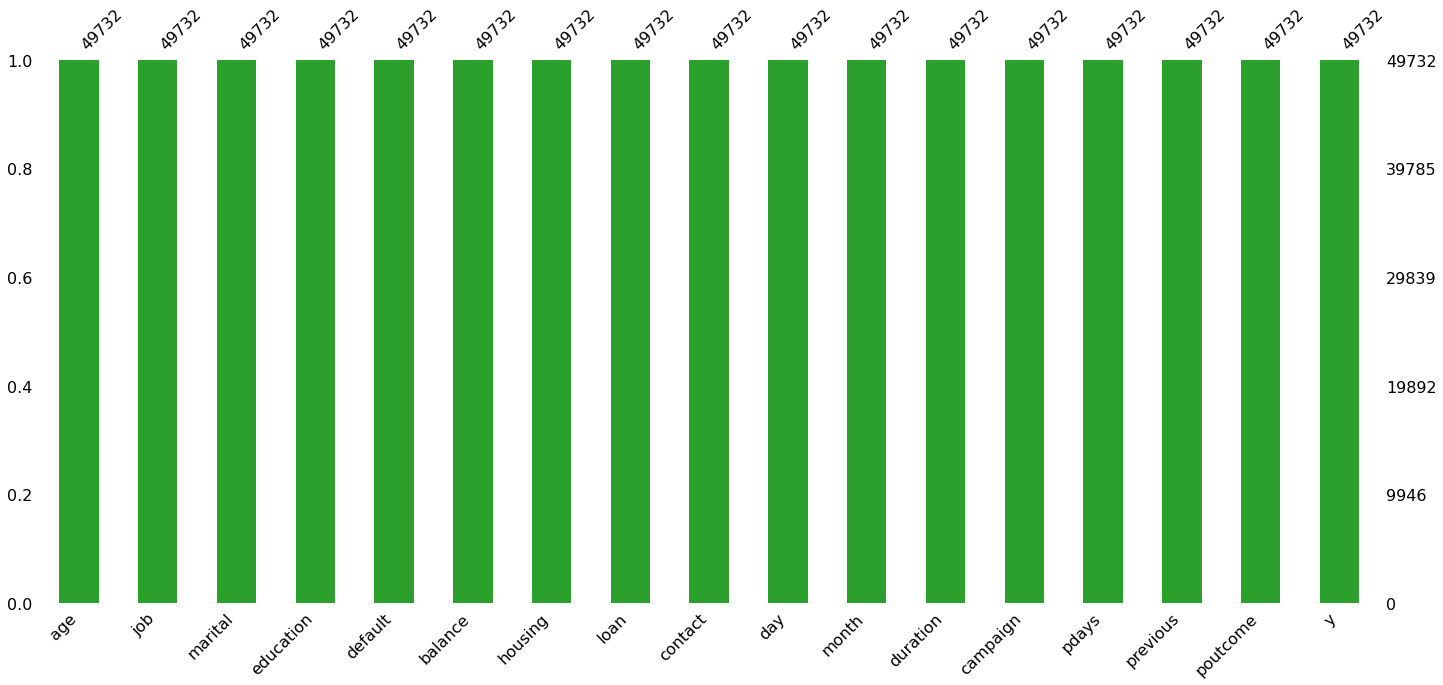

In [7]:
# plotting a bar plot for information of missing values
msno.bar(Bank, color = 'tab:green')

### From above calulation and gragh we can clearly see there is no missing values so we don't have to deal with any missing values.

In [8]:
# To see Information of all columns
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


###  In this dataset 7 numerical and 9 categorical columns.each column has no null values.

In [9]:
# to See Statistical Summary of Each Variables.
Bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,15164,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,15.816315,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,8.315680,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Inferences:
* In the job type bluecollar has maximum count i.e. 10678,The marital married type has maximum count i.e. 30011,secondary eduction type has maximum count i.e. 25508 and month may has maximum count i.e. 15164.
* The minimun of age col is 18,maximum is 95 and mean is 40.95.
* The minimum of balance is -8019 i.e. negative ,maximum is 102127 and mean is 1367.
* The minimun of duration is 0 , maximum is 4918 and mean is 258.
* The minimum of campaign is 1, maximum is 63 and mean is 2.7
* The minimum of pdays is -1 , maximum is 871 and mean is 40.
* the minimum oe previous is 0 , maximum is 275 and mean is 0.57

In [10]:
# To see unique value of each categorical columns
for col in Bank.select_dtypes(include='object').columns: # using for loop to select each categorical column in dataset
    print(col) # using print function to see columns
    print(Bank[col].unique()) # using unique function to see unique values in each columns,

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [11]:
# To check duplicate values
Bank.duplicated().sum()

4521

* In this Dataset 4521 observations are duplicate to avoid bias we have to remove that duplicate observations. 

In [12]:
# To remove duplicate values from the dataset
Bank1 =Bank.drop_duplicates()
Bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Distribution of Categorical Variables

In [13]:
for col in Bank1.select_dtypes(include='object').columns: # using for loop to select each categorical column in dataset
    print(col) # using print function to see columns

job
marital
education
default
housing
loan
contact
month
poutcome
y


In [14]:
categoricals = Bank1.select_dtypes(include = 'object').columns
categoricals

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

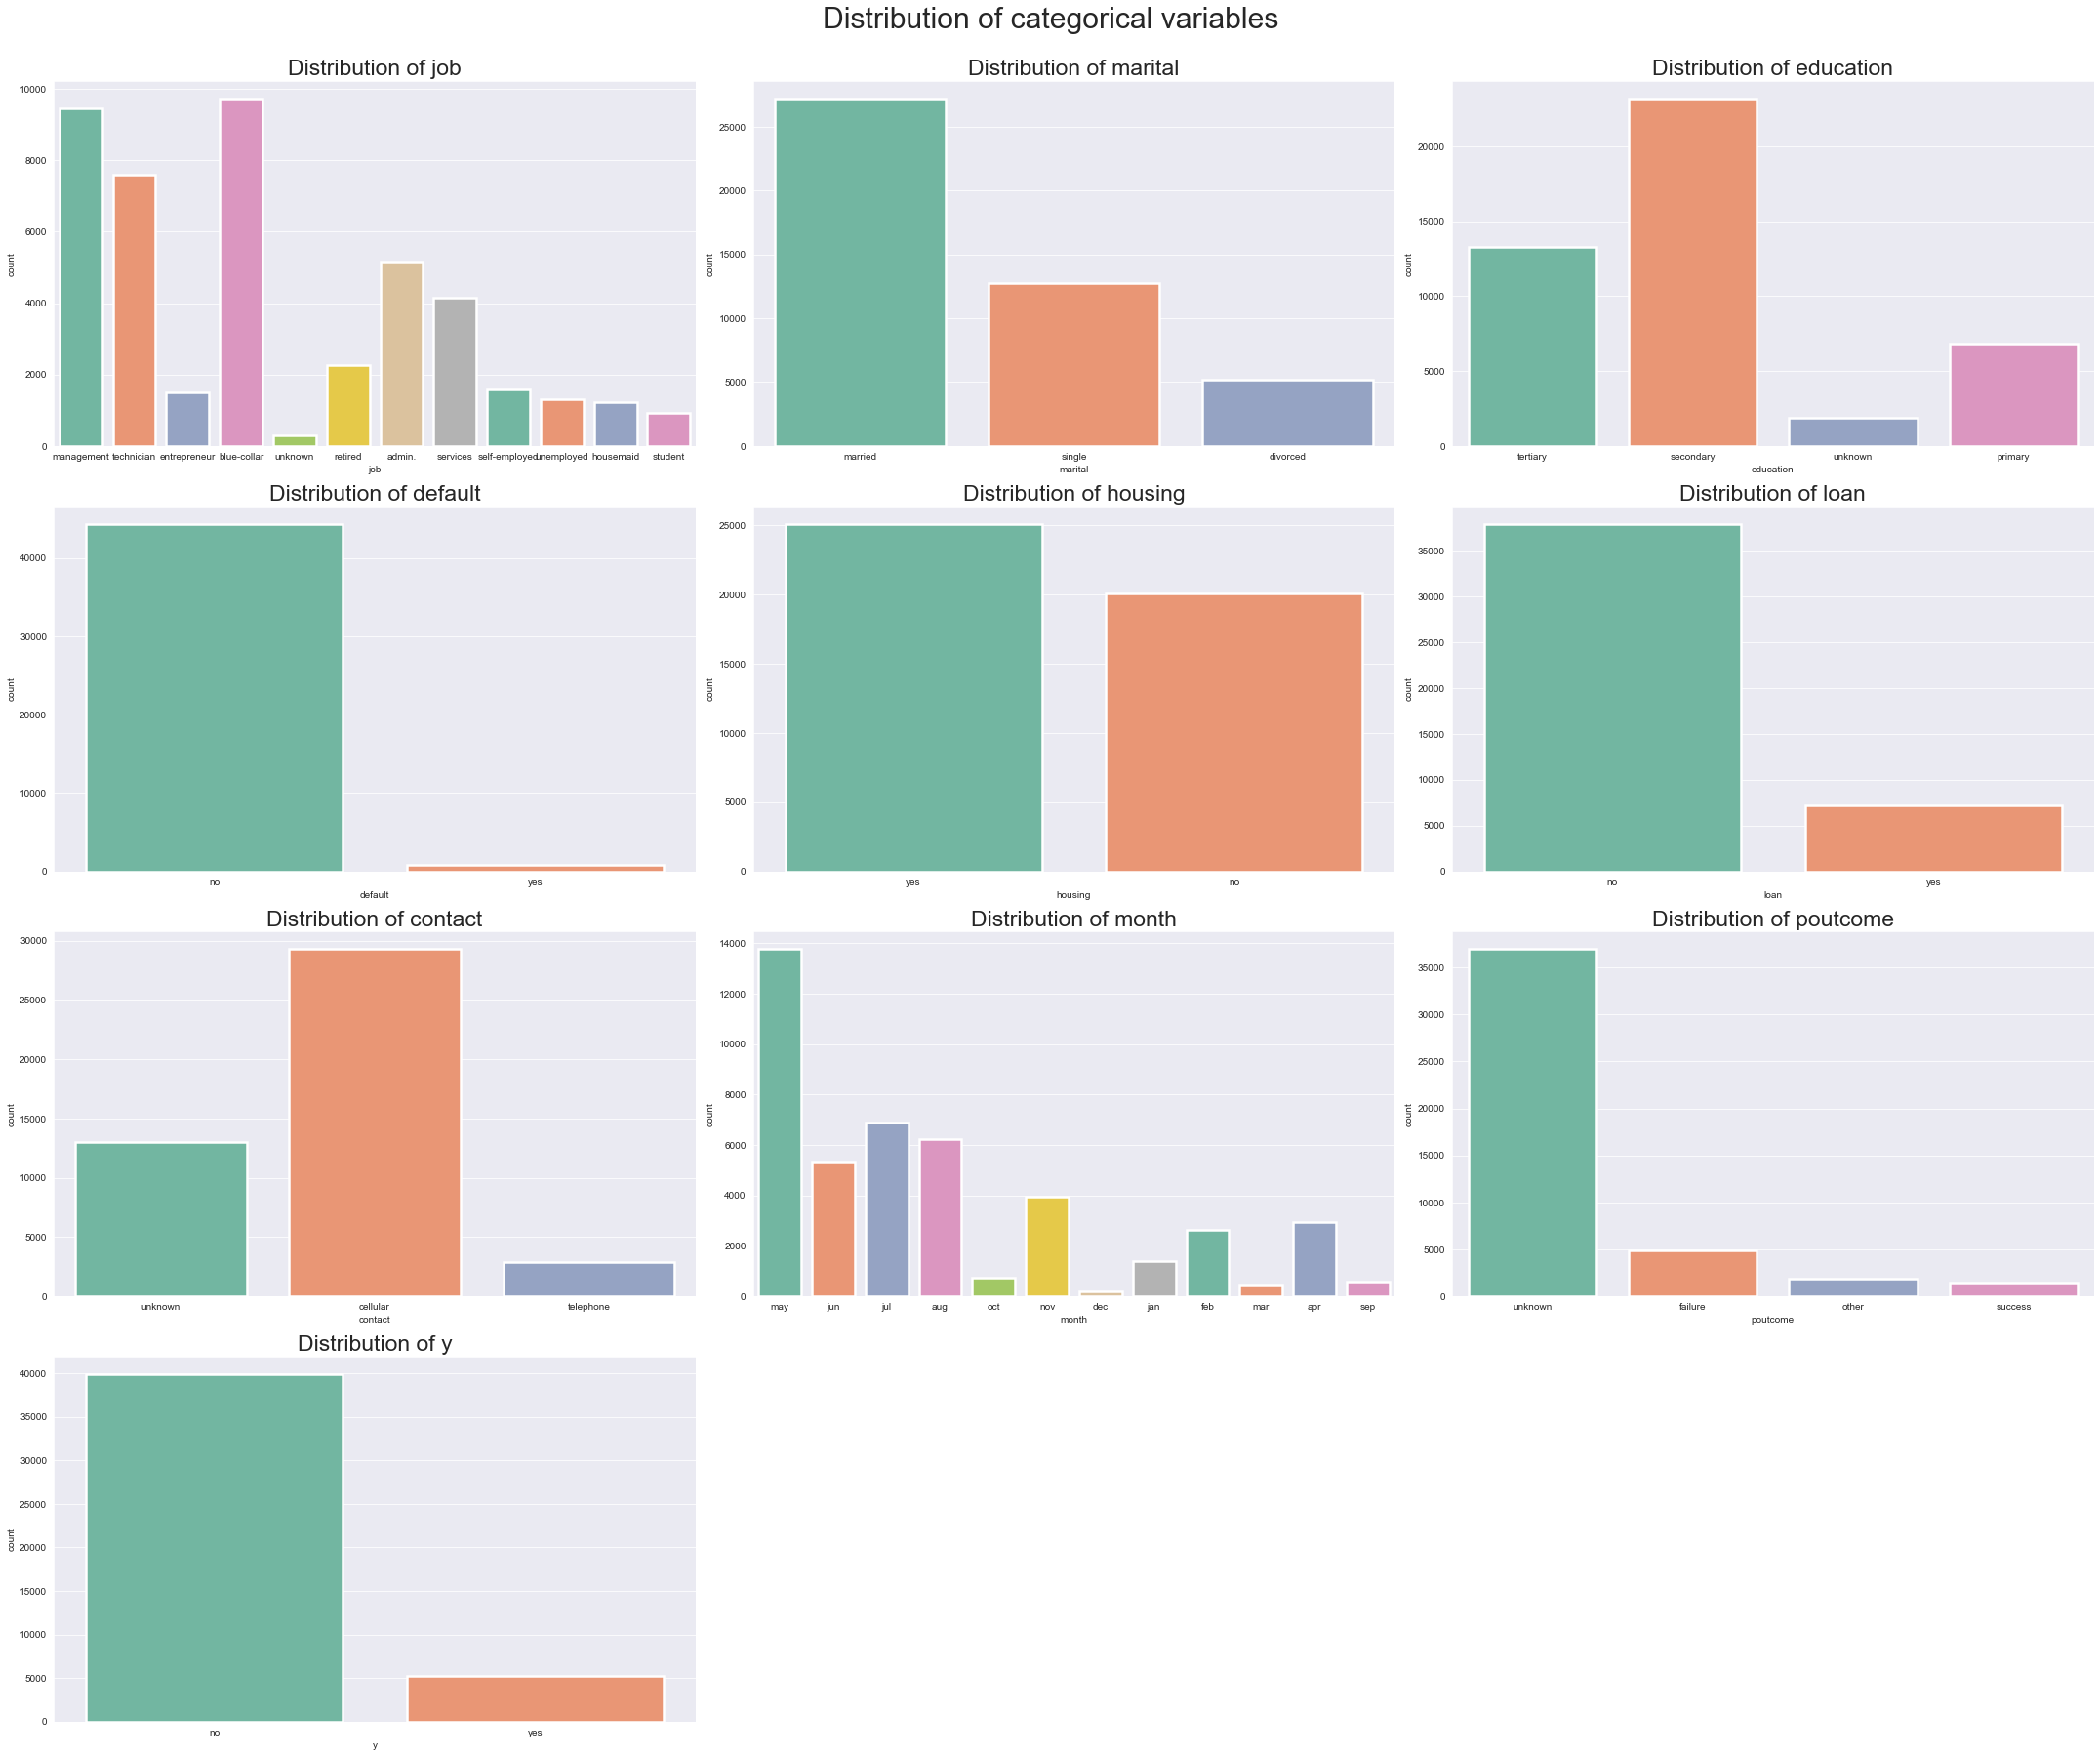

In [15]:
# To see variable are normally distributed or not creat a plot with subplot of each numerical variables
sns.set_style('darkgrid') # Here i used the .set_style function to take style of graph
count=1 # consider a variable count = 1
plt.subplots(figsize=(30, 30)) # Use .subplot function with size attribute
for i in categoricals:      # create a for loop to create a each subplot of columns
    plt.subplot(5,3,count) 
    ax = plt.gca() #The gca() fun is used to get the current Axes instance on the current figure matching the given keyword args, or create one.
    sns.countplot(Bank1[i],palette="Set2",linewidth=2.5,color='r')#creating a hisplot for every i in numericals1
    ax.set_title("Distribution of {}".format(i), fontsize=23) #use set_title function to give title for each subplot
    count+=1 
    plt.tight_layout() # The tight_layout() fun is used to automatically adjust subplot parameters to give specified padding.
plt.suptitle('Distribution of categorical variables',y=1.02,fontsize=30) # use suptitle to give name of super figure
plt.show()

### Inferences:
* Client with job type blue-collar records are high in given dataset and unknowun are very less.
* client who married are high in records in given dataset and divorced are less.
* client whoes education background is Secondary are in high numbers in given dataset.
* default feature seems to be does not play important role as it has value of no at high Ratio to value of yes which can drop.
* data in month may is high.

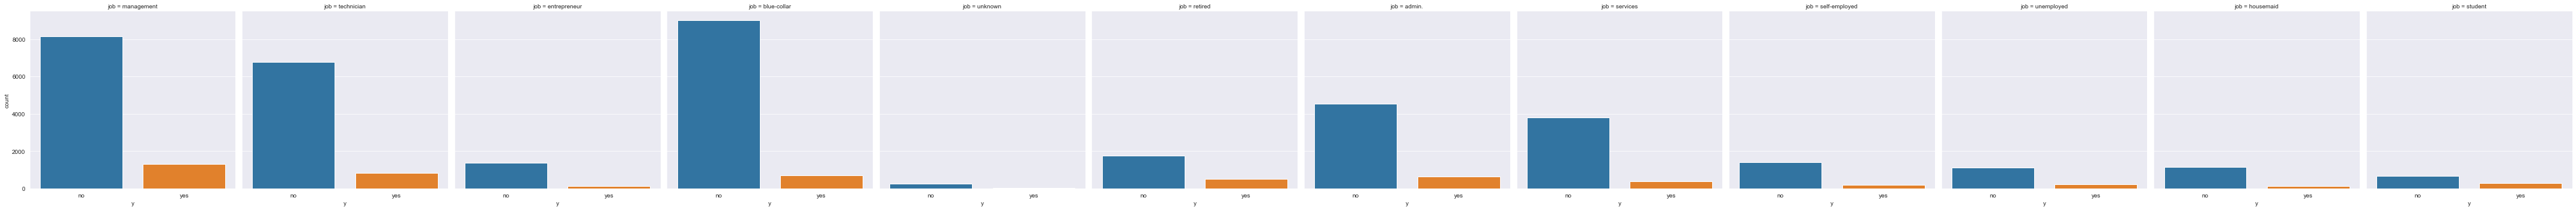

In [16]:
sns.catplot(x='y',col='job',kind='count',data=Bank1)
plt.show()    

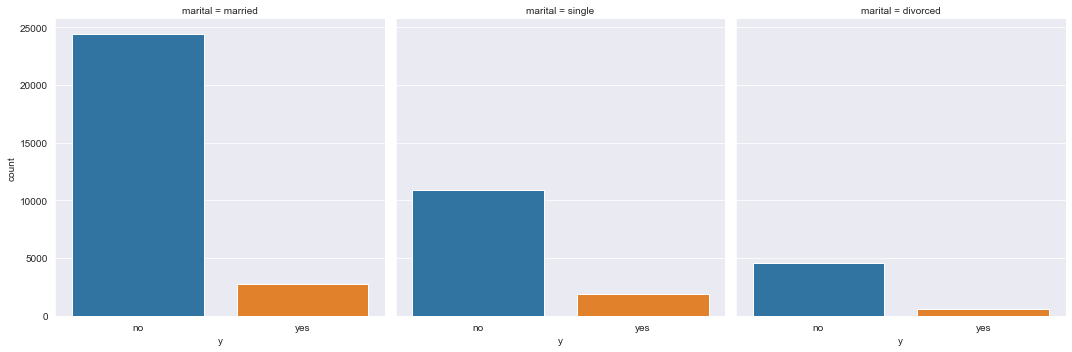

In [17]:
sns.catplot(x='y',col='marital',kind='count',data=Bank1)
plt.show()    

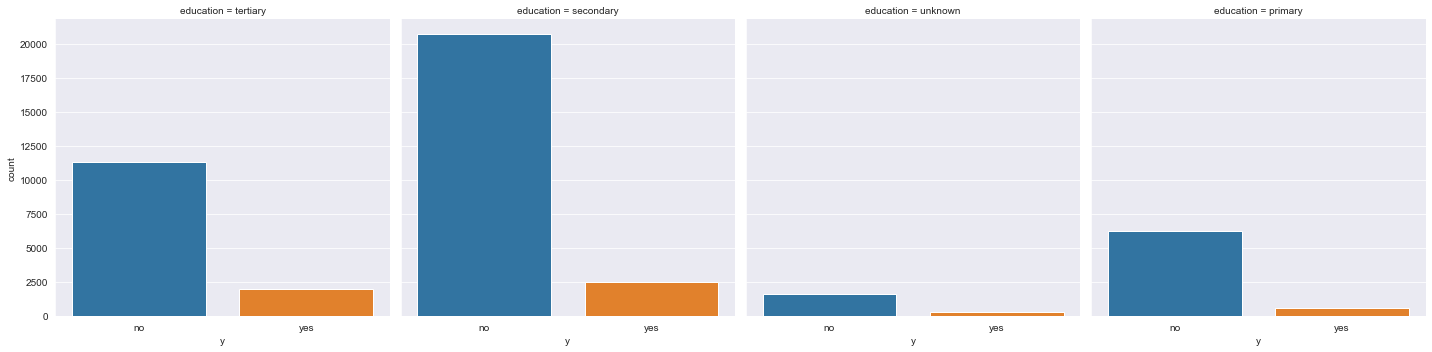

In [18]:
sns.catplot(x='y',col='education',kind='count',data=Bank1)
plt.show()    

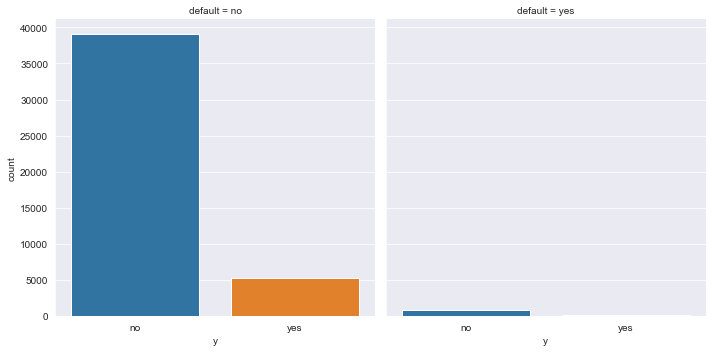

In [19]:
sns.catplot(x='y',col='default',kind='count',data=Bank1)
plt.show()    

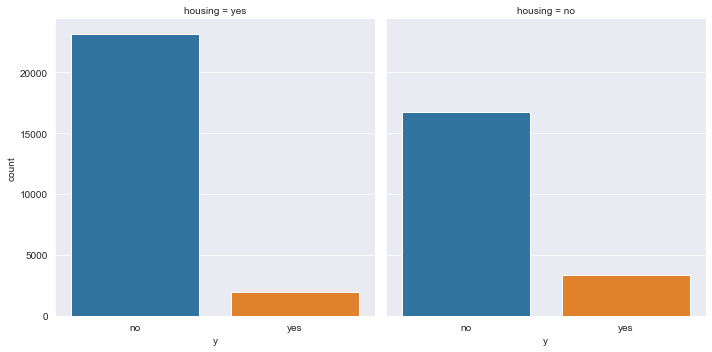

In [20]:
sns.catplot(x='y',col='housing',kind='count',data=Bank1)
plt.show()    

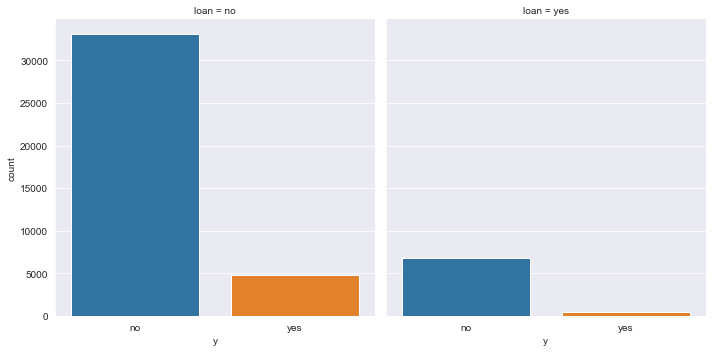

In [21]:
sns.catplot(x='y',col='loan',kind='count',data=Bank1)
plt.show()    

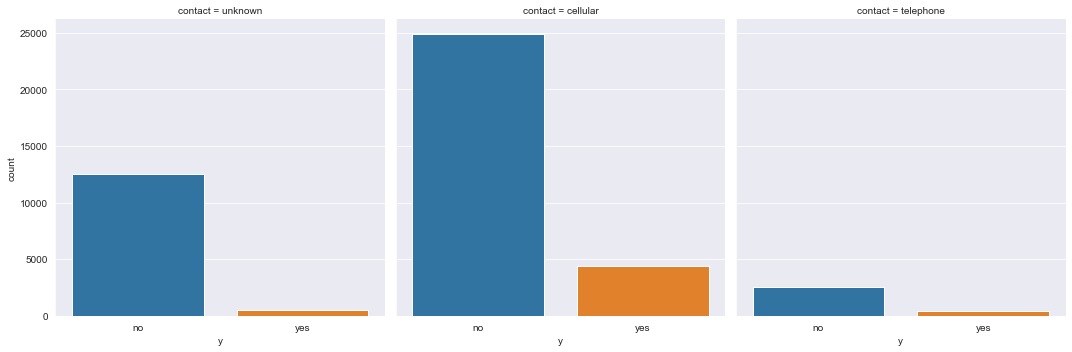

In [22]:
sns.catplot(x='y',col='contact',kind='count',data=Bank1)
plt.show()    

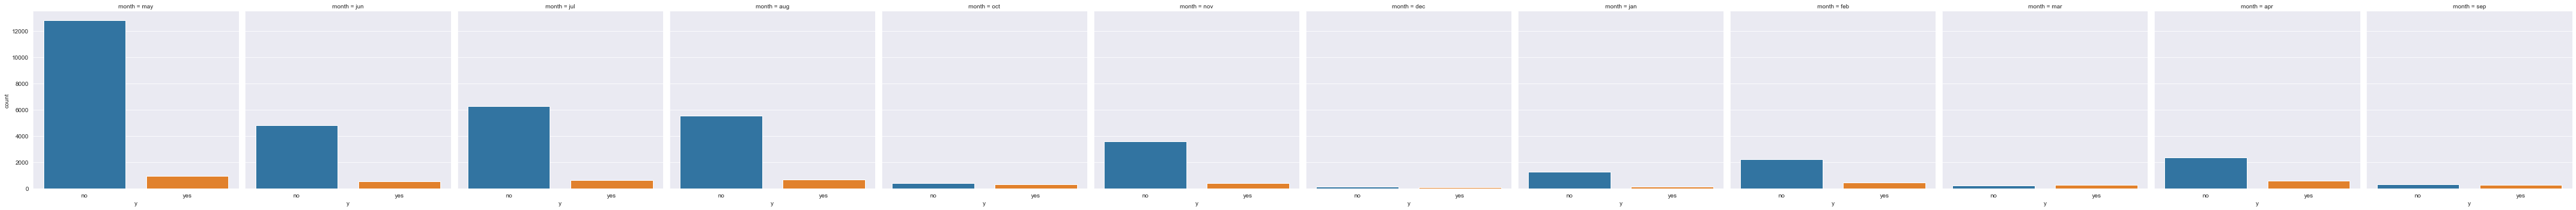

In [23]:
sns.catplot(x='y',col='month',kind='count',data=Bank1)
plt.show()    

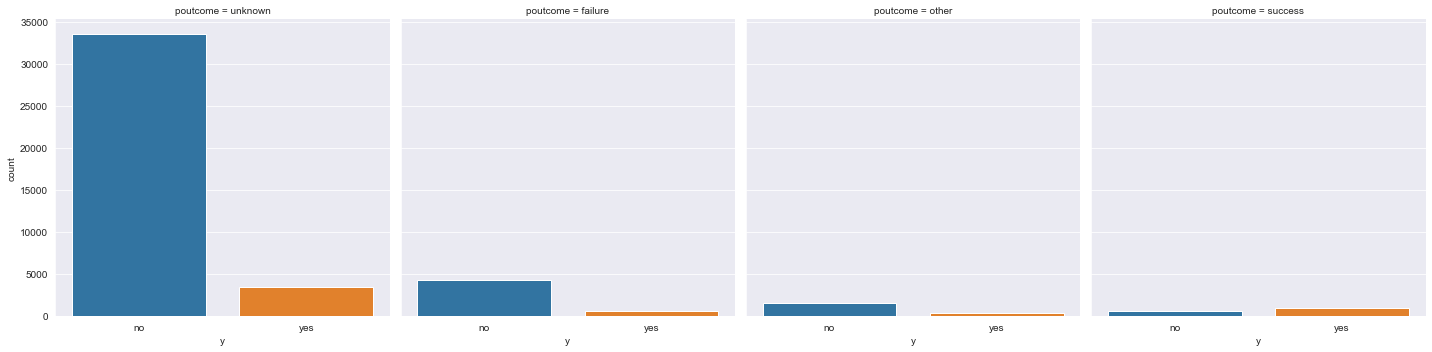

In [24]:
sns.catplot(x='y',col='poutcome',kind='count',data=Bank1)
plt.show()    

## Inferences

* management client has high inrest on deposit.
* married client has high inrest on deposit comparing to other client.
* the client contacted by celluar method shows high inrest in deposit.
* Durint month may client shows high inrest in deposit.
* The client who has housing loan shows less inrest in deposit.

## Distribution of Numerical Variables

In [25]:
# create a list of numerical variables
numericals1 = Bank1.select_dtypes(include = 'number').columns

In [26]:
# importing the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) # from warning import simplefilter

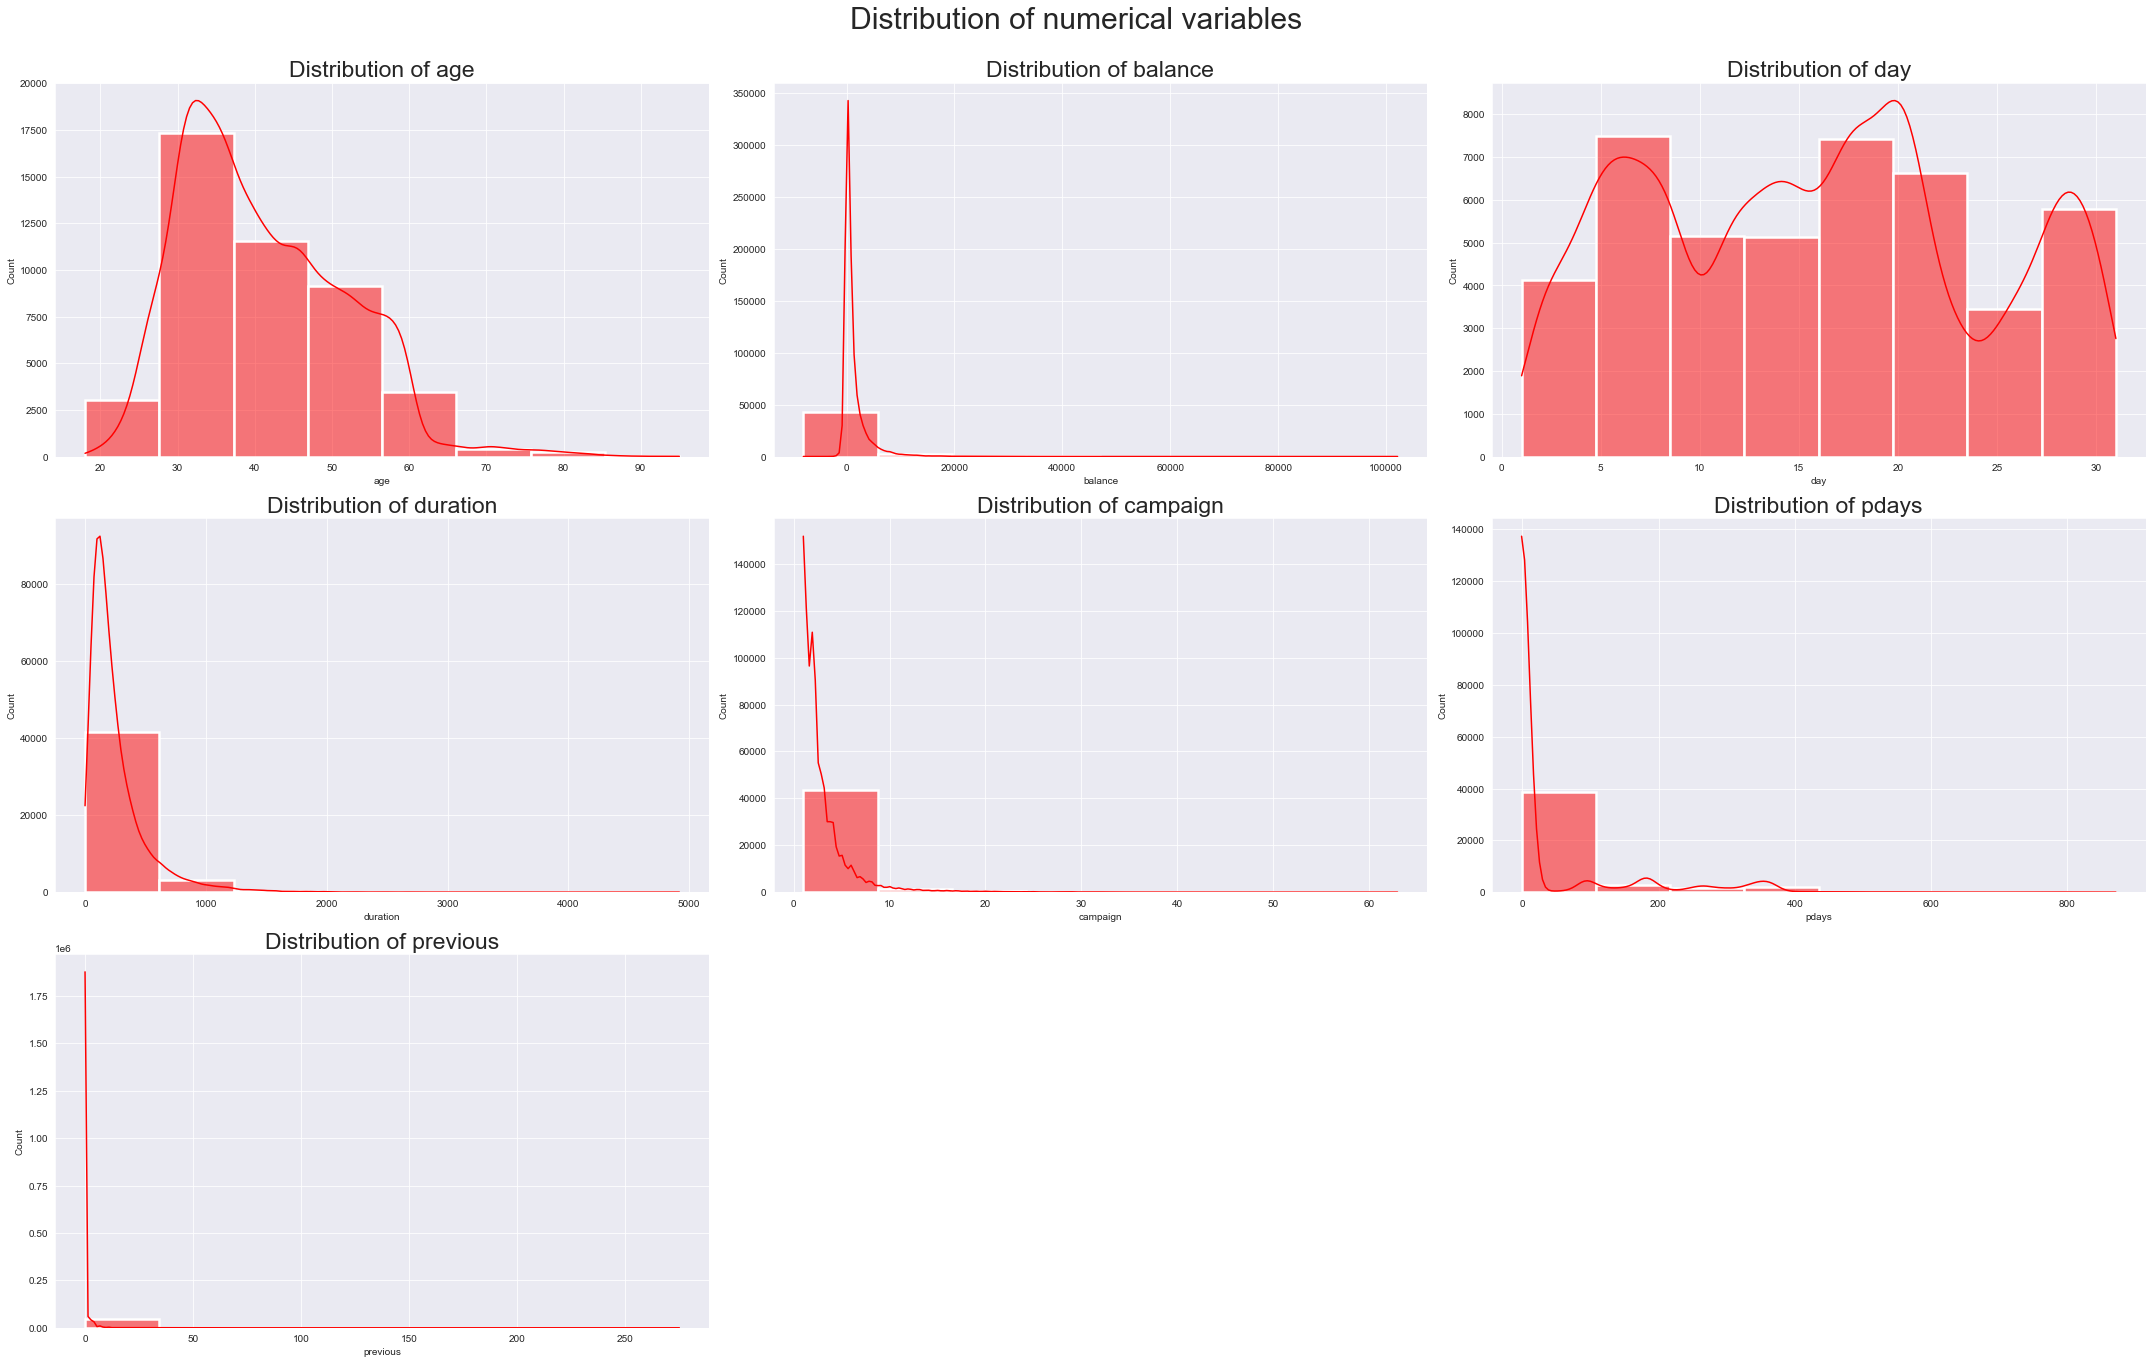

In [27]:
# To see variable are normally distributed or not creat a plot with subplot of each numerical variables
sns.set_style('darkgrid') # Here i used the .set_style function to take style of graph
count=1 # consider a variable count = 1
plt.subplots(figsize=(30, 30)) # Use .subplot function with size attribute
for i in numericals1:      # create a for loop to create a each subplot of columns
    plt.subplot(5,3,count) 
    ax = plt.gca() #The gca() fun is used to get the current Axes instance on the current figure matching the given keyword args, or create one.
    sns.histplot(Bank1[i],kde=True,bins=8, palette="Set2", linewidth=2.5,color='r')#creating a hisplot for every i in numericals1
    ax.set_title("Distribution of {}".format(i), fontsize=23) #use set_title function to give title for each subplot
    count+=1 
    plt.tight_layout() # The tight_layout() fun is used to automatically adjust subplot parameters to give specified padding.
plt.suptitle('Distribution of numerical variables',y=1.02,fontsize=30) # use suptitle to give name of super figure
plt.show()

### Inferences:
* From Above Figure The Variable age and days distributed normally.
* The Variables Balance, duration, compaign, pdays and previous right skewed distributed.

## Outliers

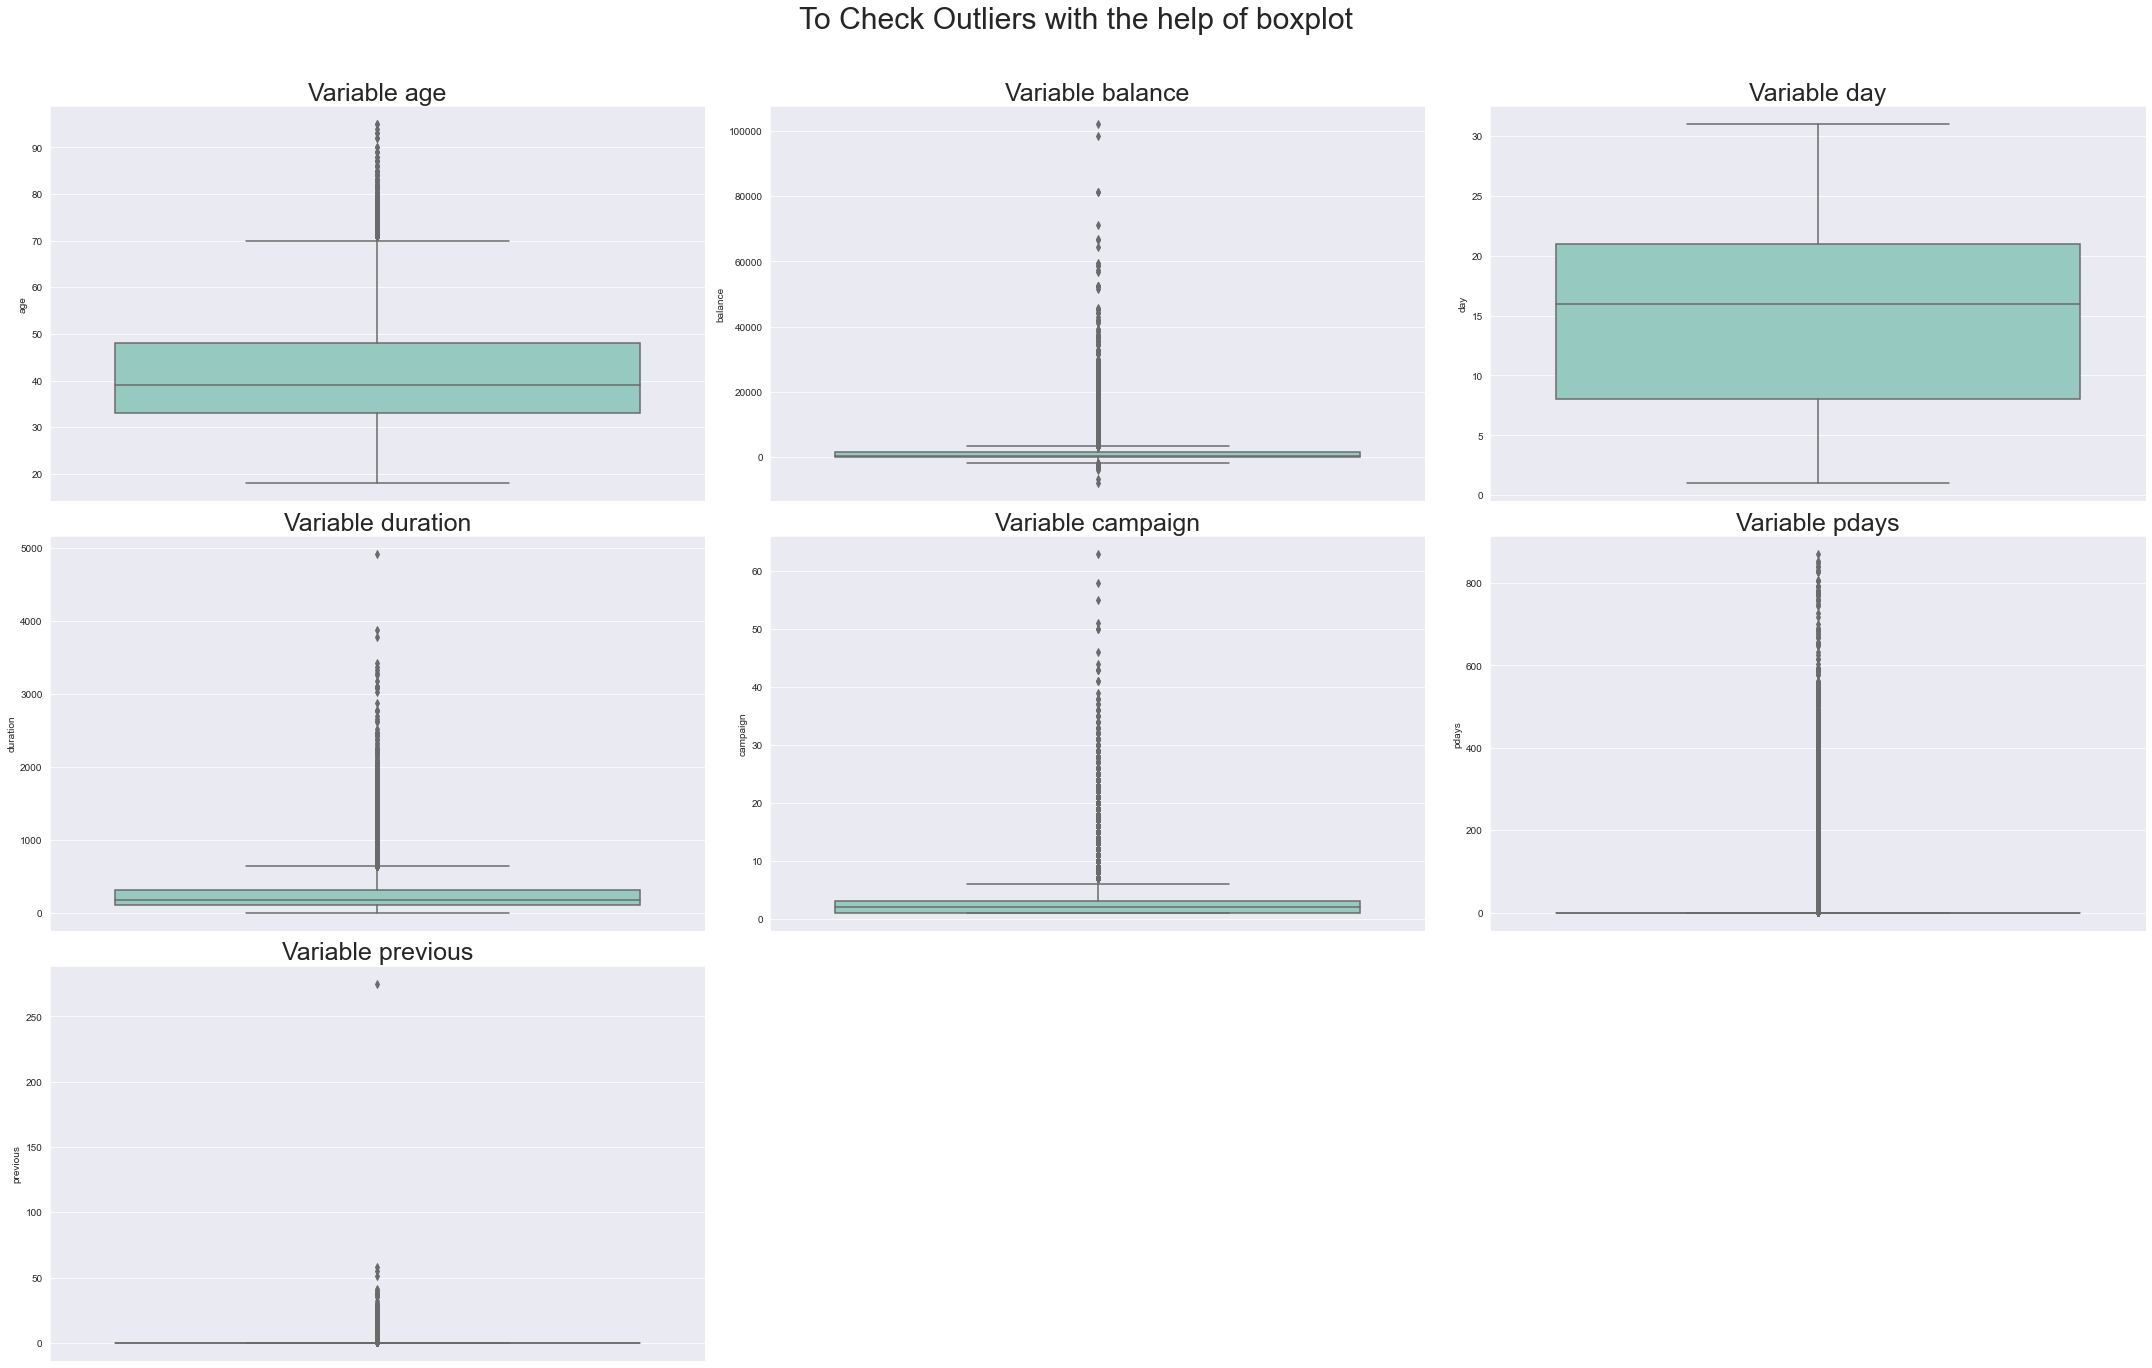

In [28]:
# Try to all boxplot in one shot
sns.set_style() 
count=1
plt.subplots(figsize=(30, 30))
for i in numericals1:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=Bank1[i], palette="Set3")
    ax.set_title("Variable {}".format(i), fontsize=25)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('To Check Outliers with the help of boxplot', y= 1.03, fontsize=30)
plt.show()

### Inferences:
* The variable day has no outliers.
* the variables age, balance, duration, campaign, pdays and previous has an outliers.

## Find Outliers

In [29]:
z = np.abs(stats.zscore(Bank1['age']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([29158, 29261, 29263, 29322, 29865, 30908, 31051, 31055, 31069,
       31089, 31099, 31101, 31116, 31125, 31130, 31145, 31151, 31183,
       31189, 31233, 31261, 31285, 31341, 31365, 31383, 31393, 31395,
       31414, 31447, 31527, 31569, 31647, 32009, 32032, 32064, 32068,
       32074, 32089, 32105, 32160, 32321, 32451, 32689, 32699, 33017,
       33360, 33414, 33455, 33699, 33706, 33719, 33751, 33752, 33766,
       33775, 33777, 33780, 33810, 33846, 33860, 34128, 40363, 40367,
       40368, 40374, 40389, 40402, 40412, 40481, 40515, 40524, 40538,
       40561, 40569, 40571, 40595, 40621, 40645, 40655, 40657, 40674,
       40676, 40710, 40712, 40726, 40759, 40786, 40792, 40816, 40838,
       40843, 40864, 40872, 40896, 40910, 40913, 40932, 40947, 40954,
       40978, 40987, 41007, 41036, 41099, 41101, 41104, 41136, 41162,
       41171, 41179, 41183, 41197, 41257, 41290, 41291, 41346, 41352,
       41376, 41387, 41406, 41423, 41439, 41448, 41469, 41470, 41505,
       41506, 41516

In [30]:
z = np.abs(stats.zscore(Bank1['balance']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([   34,    69,   334,   446,   920,  2065,  2343,  2479,  2554,
        2576,  2618,  2619,  2778,  2852,  2899,  2931,  2938,  3012,
        3024,  3099,  3197,  3327,  3500,  3806,  3851,  4025,  4081,
        4135,  4150,  4483,  4583,  4625,  4846,  4851,  4954,  4958,
        4965,  4975,  5007,  5133,  5249,  5279,  5302,  5306,  5309,
        5464,  5613,  5725,  5937,  6342,  6429,  6431,  6529,  6619,
        6779,  6825,  6876,  7014,  7079,  7156,  7169,  7198,  7200,
        7229,  7334,  7362,  7534,  7563,  7627,  7674,  7681,  7743,
        7782,  7822,  7865,  7991,  8008,  8184,  8196,  8244,  8335,
        8349,  8377,  8433,  8472,  8479,  8534,  8555,  8588,  8634,
        8700,  8724,  8828,  8854,  9047,  9068,  9079,  9117,  9162,
        9178,  9239,  9312,  9421,  9425,  9461,  9472,  9536,  9552,
        9564,  9576,  9598,  9625,  9778,  9793,  9803,  9809,  9822,
        9895,  9933, 10038, 10059, 10061, 10062, 10107, 10173, 10180,
       10260, 10262

In [31]:
z = np.abs(stats.zscore(Bank1['duration']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([   37,    43,    59,    83,    86,    87,   152,   170,   182,
         224,   388,   446,   474,   569,   600,   694,   728,   853,
         877,   960,   998,  1015,  1034,  1086,  1087,  1124,  1140,
        1189,  1193,  1247,  1273,  1416,  1462,  1563,  1731,  1810,
        1832,  1850,  1851,  1860,  1885,  1899,  1900,  1952,  2036,
        2130,  2158,  2190,  2192,  2260,  2285,  2347,  2366,  2386,
        2404,  2441,  2649,  2703,  2720,  2730,  2821,  2831,  2845,
        3027,  3135,  3140,  3145,  3170,  3190,  3255,  3289,  3314,
        3322,  3373,  3500,  3509,  3519,  3523,  3534,  3539,  3548,
        3557,  3712,  3714,  3829,  3876,  3906,  3947,  3964,  3971,
        3982,  3999,  4001,  4015,  4035,  4042,  4199,  4313,  4377,
        4382,  4416,  4427,  4431,  4509,  4561,  4572,  4607,  4634,
        4675,  4682,  4699,  4753,  4843,  4969,  4987,  5034,  5035,
        5054,  5055,  5073,  5158,  5236,  5248,  5283,  5545,  5575,
        5627,  5634

In [32]:
z = np.abs(stats.zscore(Bank1['campaign']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([ 2626,  2706,  2967,  3044,  3079,  3118,  3149,  3331,  3355,
        3475,  3483,  3529,  3577,  3604,  3645,  3664,  3673,  3813,
        3877,  3886,  3914,  3916,  3925,  3936,  3949,  3957,  3969,
        3994,  4015,  4020,  4045,  4208,  4275,  4299,  4300,  4328,
        4330,  4334,  4338,  4361,  4390,  4400,  4441,  4637,  4656,
        4698,  4750,  4790,  4964,  5073,  5102,  5107,  5138,  5140,
        5211,  5412,  5439,  5457,  5459,  5507,  5513,  5565,  5568,
        5580,  5615,  5631,  5686,  5721,  5838,  5944,  6051,  6066,
        6078,  6264,  6397,  6511,  6544,  6566,  6697,  6698,  6791,
        6935,  6959,  7043,  7341,  7393,  7439,  7443,  7470,  7493,
        7498,  7499,  7506,  7582,  7677,  7732,  7831,  7850,  7876,
        7898,  7910,  7942,  7947,  8039,  8044,  8238,  8280,  8293,
        8300,  8303,  8323,  8331,  8342,  8344,  8431,  8432,  8453,
        8512,  8513,  8544,  8547,  8574,  8615,  8621,  8641,  8668,
        8685,  8686

In [33]:
z = np.abs(stats.zscore(Bank1['pdays']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([32111, 32147, 32230, ..., 45177, 45188, 45199], dtype=int64),)
(array([], dtype=int64),)


In [34]:
z = np.abs(stats.zscore(Bank1['previous']))

# Position of the outlier
threshold = 3
print(np.where(z > 3))

threshold = -3
print(np.where(z<-3))

(array([24136, 24295, 24331, 24506, 24556, 24596, 24609, 24624, 24643,
       24649, 24723, 25085, 25228, 25278, 25344, 25350, 25353, 25420,
       25448, 25556, 25678, 25700, 25728, 25752, 25898, 26061, 26330,
       26398, 26400, 26410, 26419, 26657, 26668, 26685, 26824, 26836,
       26862, 26906, 26921, 26939, 26945, 27013, 27030, 27107, 27177,
       27406, 27448, 27493, 27624, 27631, 27639, 27711, 27792, 27855,
       27870, 27908, 27985, 28029, 28031, 28063, 28136, 28184, 28185,
       28186, 28191, 28231, 28260, 28351, 28384, 28386, 28498, 28527,
       28533, 28544, 28584, 28589, 28591, 28617, 28622, 28651, 28839,
       28848, 28879, 28886, 29159, 29182, 29279, 29300, 29372, 29388,
       29446, 29450, 29481, 29589, 29635, 29639, 29667, 29678, 29715,
       29766, 29818, 29868, 29909, 30033, 30109, 30137, 30158, 30159,
       30165, 30170, 30180, 30189, 30208, 30241, 30256, 30259, 30324,
       30336, 30492, 30509, 30525, 30567, 30584, 30597, 30599, 30636,
       30835, 30884

### Outliers Removal using Zscore

In [35]:
#Outliers Removal using Zscore
Bank2 = Bank1[(np.abs(stats.zscore(Bank1['age'])) < 3)]
Bank2 =Bank1[(np.abs(stats.zscore(Bank1['balance'])) < 3)]
Bank2 =Bank1[(np.abs(stats.zscore(Bank1['campaign'])) < 3)]
Bank2 =Bank1[(np.abs(stats.zscore(Bank1['pdays'])) < 3)]
Bank2 =Bank1[(np.abs(stats.zscore(Bank1['previous'])) < 3)]
Bank2 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


## Relationship between variables

no     39483
yes     5146
Name: y, dtype: int64

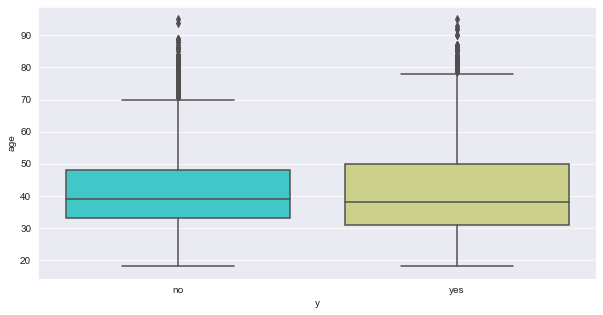

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='age',data=Bank2,palette='rainbow')
Bank2['y'].value_counts()

* From above figure there is no huge difference category yes and no regarding age.

no     39483
yes     5146
Name: y, dtype: int64

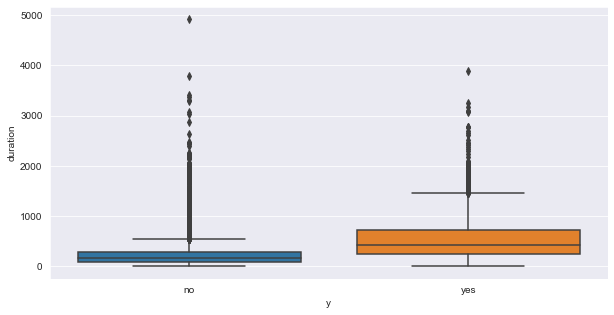

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='duration',data=Bank2)
Bank2['y'].value_counts()

no     39483
yes     5146
Name: y, dtype: int64

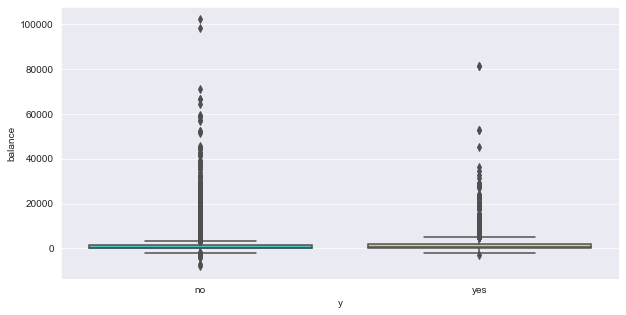

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='balance',data=Bank2,palette='rainbow')
Bank2['y'].value_counts()

no     39483
yes     5146
Name: y, dtype: int64

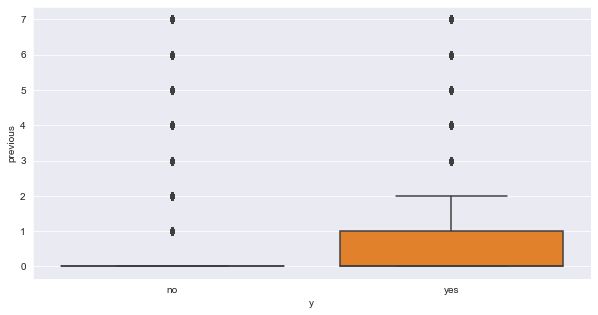

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='previous',data=Bank2)
Bank2['y'].value_counts()

no     39483
yes     5146
Name: y, dtype: int64

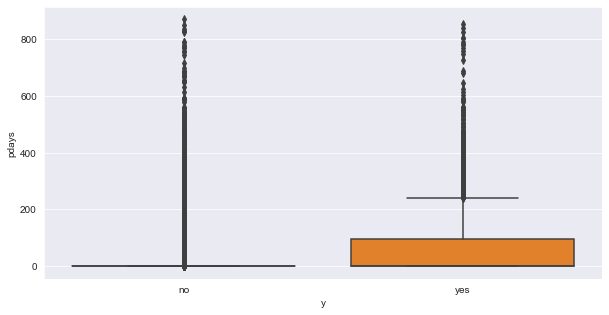

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='pdays',data=Bank2)
Bank2['y'].value_counts()

no     39483
yes     5146
Name: y, dtype: int64

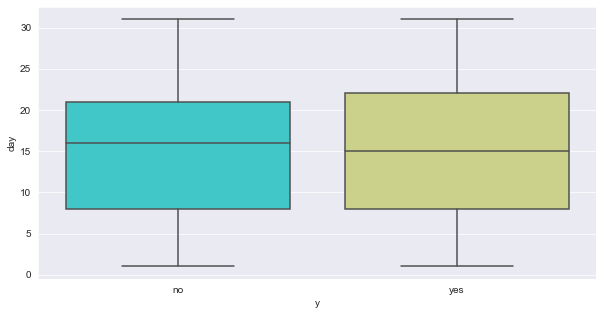

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='day',data=Bank2,palette='rainbow')
Bank2['y'].value_counts()

no     39483
yes     5146
Name: y, dtype: int64

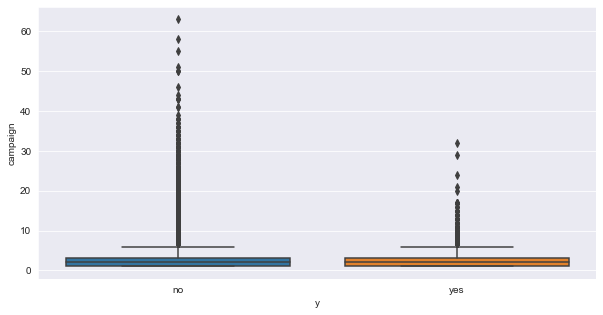

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='campaign',data=Bank2)
Bank2['y'].value_counts()

## Inferences

* After removing outlier still we have outliers.
* client shows interest on deposite who has discussion for longer duration. 

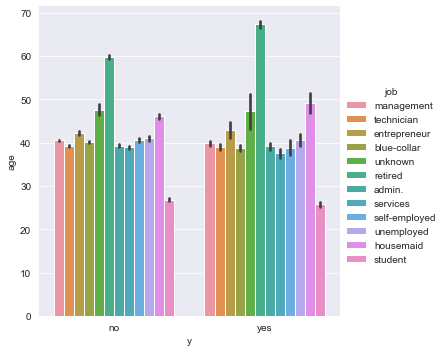

In [43]:
sns.catplot(x="y", y="age", hue="job", kind="bar", data=Bank2)

## Corelation Matrix

In [44]:
Bank2.corr(method ='spearman')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.095787,-0.009983,-0.033846,0.037814,-0.016692,-0.011452
balance,0.095787,1.000000,0.000511,0.041862,-0.030936,0.068423,0.077168
day,-0.009983,0.000511,1.000000,-0.059114,0.142344,-0.089348,-0.084968
duration,-0.033846,0.041862,-0.059114,1.000000,-0.105142,0.030800,0.033249
campaign,0.037814,-0.030936,0.142344,-0.105142,1.000000,-0.121654,-0.119683
pdays,-0.016692,0.068423,-0.089348,0.030800,-0.121654,1.000000,0.987470
previous,-0.011452,0.077168,-0.084968,0.033249,-0.119683,0.987470,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

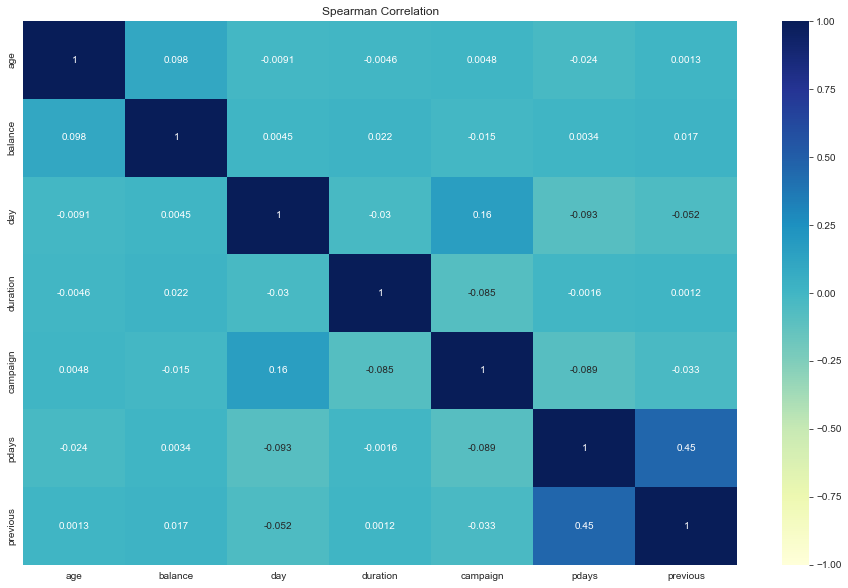

In [45]:
def display_correlation(Bank1):
    r = Bank1.corr(method="spearman")
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(Bank1.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
plt.title("Spearman Correlation")

* The balance and age highly corelated variables.


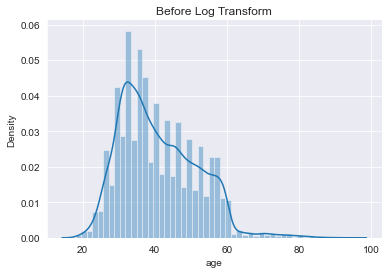

C:\Users\DELL\AppData\Local\Temp/ipykernel_3348/2390601446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank2['age'] = np.log(Bank1['age'])


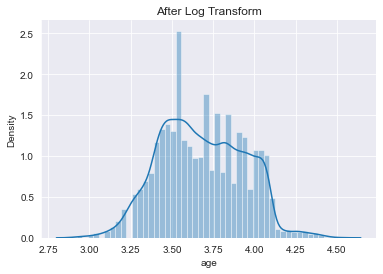

In [46]:
sns.distplot(Bank2['age'])
plt.title("Before Log Transform")
sns.despine()
plt.show()

Bank2['age'] = np.log(Bank1['age'])
sns.distplot(Bank2['age'])
plt.title("After Log Transform")
sns.despine()
plt.show()